# Introduction

With the growing prominence of Airbnb in the short-term rental market, particularly in Africa, it is important that hosts and investors have better knowledge regarding the drivers of listing performance. These will benefit tourism, real estate, and urban planning.

## Business Problem

Airbnb hosts in Cape Town city often struggle to find the optimal pricing balance between maximizing occupancy and revenue, while guests face challenges in discovering the best-value listings that meet their needs. To address this, our project will develop a machine learning-based recommendation system to predict optimal prices for Airbnb listings by analyzing factors such as location, customer reviews, and amenities. This will help hosts improve their pricing strategy and increase revenue while providing guests with personalized recommendations for the best Airbnbs available, based on their preferences and budget.

In [167]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
calendar = pd.read_csv('data/calendar.csv.gz', compression='gzip')
calendar

C:\Users\ericm\AppData\Local\Temp\ipykernel_29064\1076570767.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  calendar = pd.read_csv('data/calendar.csv.gz', compression='gzip')


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,3191,2024-06-29,f,$47.00,NaN,3.0,730.0
1,3191,2024-06-30,f,$47.00,NaN,3.0,730.0
2,3191,2024-07-01,f,$47.00,NaN,3.0,730.0
3,3191,2024-07-02,f,$47.00,NaN,3.0,730.0
4,3191,2024-07-03,f,$47.00,NaN,3.0,730.0
...,...,...,...,...,...,...,...
8588961,1188911808490635053,2025-06-24,t,"$2,750.00",NaN,2.0,365.0
8588962,1188911808490635053,2025-06-25,t,"$2,750.00",NaN,2.0,365.0
8588963,1188911808490635053,2025-06-26,t,"$2,750.00",NaN,2.0,365.0
8588964,1188911808490635053,2025-06-27,t,"$2,750.00",NaN,2.0,365.0


In [3]:
calendar.isna().sum()

listing_id              0
date                    0
available               0
price                   0
adjusted_price    8572541
minimum_nights          2
maximum_nights          2
dtype: int64

In [4]:
calendar.drop(columns='adjusted_price', inplace=True)

In [5]:
calendar.dropna(inplace=True)

In [6]:
calendar_df = calendar.head(50000)
calendar_df

,listing_id,date,available,price,minimum_nights,maximum_nights
0,3191,2024-06-29,f,$47.00,3.0,730.0
1,3191,2024-06-30,f,$47.00,3.0,730.0
2,3191,2024-07-01,f,$47.00,3.0,730.0
3,3191,2024-07-02,f,$47.00,3.0,730.0
4,3191,2024-07-03,f,$47.00,3.0,730.0
...,...,...,...,...,...,...
49995,688644,2024-11-16,t,"$3,200.00",1.0,731.0
49996,688644,2024-11-17,f,"$3,200.00",1.0,731.0
49997,688644,2024-11-18,f,"$3,200.00",1.0,731.0
49998,688644,2024-11-19,f,"$3,200.00",1.0,731.0


In [44]:
listings = pd.read_csv('data/listings.csv.gz', compression='gzip')
listings

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3191,https://www.airbnb.com/rooms/3191,20240629050116,2024-06-29,city scrape,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...","Mowbray is on the Southern Suburbs line, 6km (...",https://a0.muscache.com/pictures/697022/385407...,3754,...,4.96,4.77,4.81,NaN,t,1,1,0,0,0.59
1,298622,https://www.airbnb.com/rooms/298622,20240629050116,2024-06-29,city scrape,Stunning Sea View apt on the Cape Peninsula,"This light, airy, well equipped self-catering...","The area is very beautiful, with sea and mount...",https://a0.muscache.com/pictures/3547300/40a29...,1539169,...,4.99,4.87,4.89,NaN,f,1,1,0,0,0.47
2,357793,https://www.airbnb.com/rooms/357793,20240629050116,2024-06-30,city scrape,CityChic @ the Piazza meets Table Mountain,"Superb 2 bedroom penthouse, with balcony, in t...",NaN,https://a0.muscache.com/pictures/272b7efe-6924...,1802190,...,4.79,4.73,4.83,NaN,f,1,1,0,0,1.54
3,357993,https://www.airbnb.com/rooms/357993,20240629050116,2024-06-29,city scrape,Beach View Studio with Balcony Walkout,Camps Bay Guesthouse Studio is an ultra-modern...,The studio is situated in the extremely popula...,https://a0.muscache.com/pictures/c222b47a-fab5...,1811942,...,4.84,4.76,4.64,NaN,f,3,3,0,0,0.86
4,15007,https://www.airbnb.com/rooms/15007,20240629050116,2024-06-29,city scrape,Blaauwberg House (now with inverter),Welcome to our self-catering beach-front famil...,"Bloubergstrand is a lovely, cosy suburb near C...",https://a0.muscache.com/pictures/3b654aa4-248e...,59072,...,4.96,4.93,4.85,NaN,f,4,4,0,0,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23559,1188291221547394413,https://www.airbnb.com/rooms/1188291221547394413,20240629050116,2024-06-29,city scrape,Stunning Views 1-Bedroom Getaway,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,172376972,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
23560,1188334042569022164,https://www.airbnb.com/rooms/1188334042569022164,20240629050116,2024-06-29,city scrape,Sea View Sanctuary at Shakawe Villa,Shakawe Villa in Camps Bay offers an African-i...,"Camps Bay, nestled between the Twelve Apostles...",https://a0.muscache.com/pictures/prohost-api/H...,57218252,...,NaN,NaN,NaN,NaN,f,134,134,0,0,NaN
23561,1188840308116053873,https://www.airbnb.com/rooms/1188840308116053873,20240629050116,2024-06-29,city scrape,40 on L Modern Oasis with Stunning Views,Welcome to our stylish and modern apartment lo...,Located in the vibrant and historic Bo-Kaap ne...,https://a0.muscache.com/pictures/prohost-api/H...,586206792,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
23562,1188889620955207276,https://www.airbnb.com/rooms/1188889620955207276,20240629050116,2024-06-29,city scrape,Vibrant Shared Space With Neat Private Room,Welcome to the basement-level room at Metropol...,Opting for accommodation in Green Point means ...,https://a0.muscache.com/pictures/prohost-api/H...,580470060,...,NaN,NaN,NaN,NaN,f,2,2,0,0,NaN


In [47]:
listings.isna().sum()

id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Length: 75, dtype: int64

In [46]:
listings.dropna(subset=['reviews_per_month'], inplace=True)

In [49]:
reviews = pd.read_csv('data/reviews.csv.gz', compression='gzip')
reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3191,4888238,2013-05-31,5737473,Kathleen,Great home away from home! Bridgette and Marth...
1,3191,9128602,2013-12-09,8170322,Anita,Das Cottage liegt ruhig und sicher. Wir haben...
2,3191,9924130,2014-01-20,4039279,Zacki,This cottage was a great base from which to ex...
3,3191,16659537,2014-07-31,9729939,Doug,I had a great stay. All my needs were well ex...
4,3191,23247470,2014-11-26,9681619,Christopher,Excellent host. She provided everything we cou...
...,...,...,...,...,...,...
560433,1176776459864168795,1179648539055748397,2024-06-15,22219490,Alma,We had a magnificent stay at Joshua’s place in...
560434,1176776459864168795,1182546772295899939,2024-06-19,175402238,Kyle,My stay was exceptional! The apartment was imm...
560435,1177000114442548438,1186115734947825687,2024-06-24,348893575,Marcus,"Fantastic stay, beautiful apartment with amazi..."
560436,1177475834453160866,1186071364511823679,2024-06-24,90974045,Theo,Very friendly family in a nice quiet neighbour...


In [50]:
reviews.isna().sum()

listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      1
comments         117
dtype: int64

In [21]:
reviews.dropna(inplace=True)

In [33]:
listings['id']

0                       3191
1                     298622
2                     357793
3                     357993
4                      15007
                ...         
23334    1177475834453160866
23351    1178981156762736853
23376    1180872643854270617
23381    1180961208499096485
23549    1187749848139464103
Name: id, Length: 18456, dtype: int64

In [54]:
# merge datasets
review_listings = reviews.merge(listings, left_on='listing_id', right_on='id', how='inner')
review_listings.head()

,listing_id,id_x,date,reviewer_id,reviewer_name,comments,id_y,listing_url,scrape_id,last_scraped,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3191,4888238,2013-05-31,5737473,Kathleen,Great home away from home! Bridgette and Marth...,3191,https://www.airbnb.com/rooms/3191,20240629050116,2024-06-29,...,4.96,4.77,4.81,NaN,t,1,1,0,0,0.59
1,3191,9128602,2013-12-09,8170322,Anita,Das Cottage liegt ruhig und sicher. Wir haben...,3191,https://www.airbnb.com/rooms/3191,20240629050116,2024-06-29,...,4.96,4.77,4.81,NaN,t,1,1,0,0,0.59
2,3191,9924130,2014-01-20,4039279,Zacki,This cottage was a great base from which to ex...,3191,https://www.airbnb.com/rooms/3191,20240629050116,2024-06-29,...,4.96,4.77,4.81,NaN,t,1,1,0,0,0.59
3,3191,16659537,2014-07-31,9729939,Doug,I had a great stay. All my needs were well ex...,3191,https://www.airbnb.com/rooms/3191,20240629050116,2024-06-29,...,4.96,4.77,4.81,NaN,t,1,1,0,0,0.59
4,3191,23247470,2014-11-26,9681619,Christopher,Excellent host. She provided everything we cou...,3191,https://www.airbnb.com/rooms/3191,20240629050116,2024-06-29,...,4.96,4.77,4.81,NaN,t,1,1,0,0,0.59


In [58]:
review_listings.date

0         2013-05-31
1         2013-12-09
2         2014-01-20
3         2014-07-31
4         2014-11-26
             ...    
560315    2024-06-15
560316    2024-06-19
560317    2024-06-24
560318    2024-06-24
560319    2024-06-26
Name: date, Length: 560320, dtype: object

In [62]:
# check duplicates
review_listings.duplicated().sum()

0

In [63]:
# check null
review_listings.isna().sum()

listing_id                                      0
id_x                                            0
date                                            0
reviewer_id                                     0
reviewer_name                                   0
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Length: 81, dtype: int64

In [57]:
review_listings.columns

Index(['listing_id', 'id_x', 'date', 'reviewer_id', 'reviewer_name',
       'comments', 'id_y', 'listing_url', 'scrape_id', 'last_scraped',
       'source', 'name', 'description', 'neighborhood_overview', 'picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maxi

In [153]:
# drop columns
# drop unnecessary columns in `capetown_airbnb_df`
columns_to_drop = ['id_x','reviewer_id', 'reviewer_name', 'id_y', 'listing_url', 'scrape_id', 'last_scraped',
       'source', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location','neighborhood_overview',
       'host_about', 'host_picture_url', 'host_listings_count', 'neighbourhood_group_cleansed', 'neighbourhood', 'bathrooms_text',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights','maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'calendar_updated', 'calendar_last_scraped', 'number_of_reviews', 'first_review',
       'last_review', 'license', 'calculated_host_listings_count', 'host_neighbourhood',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'  ]

cleaned_df = review_listings.drop(columns=columns_to_drop)

In [163]:
cleaned_df.isna().sum()

listing_id                     0
date                           0
comments                       0
name                           0
description                    0
host_response_time             0
host_response_rate             0
host_acceptance_rate           0
host_is_superhost              0
host_thumbnail_url             0
host_total_listings_count      0
host_verifications             0
host_has_profile_pic           0
host_identity_verified         0
neighbourhood_cleansed         0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
amenities                      0
price                          0
minimum_nights_avg_ntm         0
maximum_nights_avg_ntm         0
has_availability               0
availability_30                0
availability_60                0
availabili

In [162]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 449740 entries, 0 to 560319
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   449740 non-null  int64  
 1   date                         449740 non-null  object 
 2   comments                     449740 non-null  object 
 3   name                         449740 non-null  object 
 4   description                  449740 non-null  object 
 5   host_response_time           449740 non-null  object 
 6   host_response_rate           449740 non-null  object 
 7   host_acceptance_rate         449740 non-null  object 
 8   host_is_superhost            449740 non-null  object 
 9   host_thumbnail_url           449740 non-null  object 
 10  host_total_listings_count    449740 non-null  int64  
 11  host_verifications           449740 non-null  object 
 12  host_has_profile_pic         449740 non-null  object 
 13  host

In [161]:
# drop na for host_response_time, host_response_rate
cleaned_df.dropna(inplace=True)

# EDA
- Univariate Analysis
- Bivariate Analysis

## Univariate Analysis

#### Date

In [164]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 449740 entries, 0 to 560319
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   449740 non-null  int64  
 1   date                         449740 non-null  object 
 2   comments                     449740 non-null  object 
 3   name                         449740 non-null  object 
 4   description                  449740 non-null  object 
 5   host_response_time           449740 non-null  object 
 6   host_response_rate           449740 non-null  object 
 7   host_acceptance_rate         449740 non-null  object 
 8   host_is_superhost            449740 non-null  object 
 9   host_thumbnail_url           449740 non-null  object 
 10  host_total_listings_count    449740 non-null  int64  
 11  host_verifications           449740 non-null  object 
 12  host_has_profile_pic         449740 non-null  object 
 13  host

In [166]:
cleaned_df.date.value_counts()

date
2024-01-02    998
2024-01-03    909
2024-04-14    766
2024-04-01    760
2024-04-15    743
             ... 
2013-11-11      1
2013-09-29      1
2013-09-07      1
2013-08-27      1
2020-05-12      1
Name: count, Length: 4096, dtype: int64

In [168]:
# Convert 'date' to datetime format
cleaned_df['date'] = pd.to_datetime(cleaned_df['date'])

In [170]:
# Count occurrences of each date
date_counts = cleaned_df['date'].value_counts().sort_index() 
date_counts

date
2010-06-15      1
2010-06-20      1
2010-12-14      1
2011-03-12      1
2011-07-23      1
             ... 
2024-06-25    122
2024-06-26     92
2024-06-27     69
2024-06-28     66
2024-06-29     17
Name: count, Length: 4096, dtype: int64

c:\Users\ericm\anaconda3\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ericm\anaconda3\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


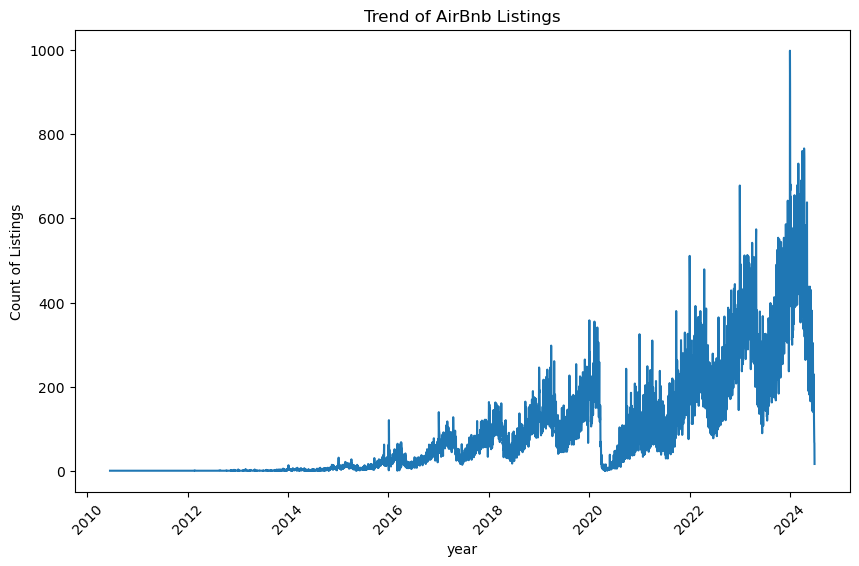

In [220]:
# Create a line plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=date_counts.index, y=date_counts.values)

# Add labels and title
plt.xlabel('year')
plt.ylabel('Count of Listings')
plt.title('Trend of AirBnb Listings')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show();


- AirBnb listings has increased over the years.

c:\Users\ericm\anaconda3\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ericm\anaconda3\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


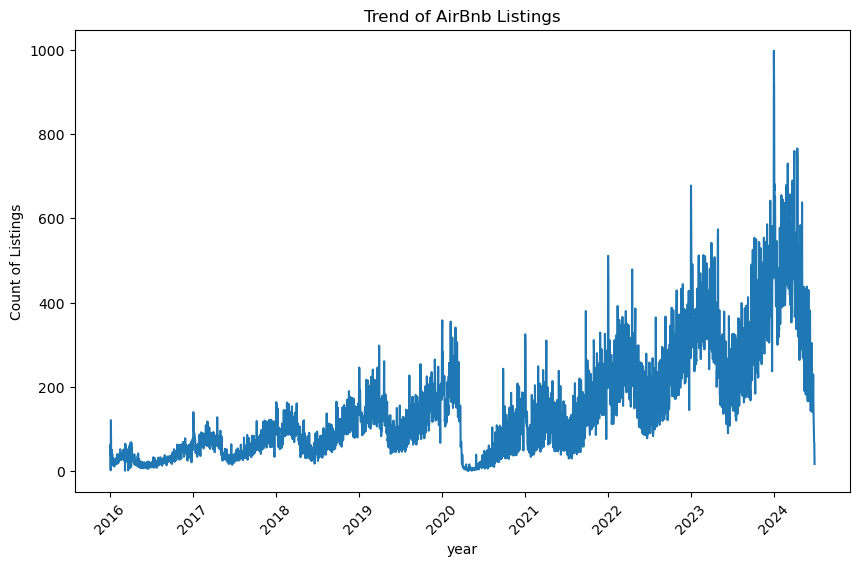

In [226]:
# lets get a closer look at the data to see seasonality
# line plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=date_counts[date_counts.index >= '2016'].index, y=date_counts[date_counts.index >= '2016'].values)

# Add labels and title
plt.xlabel('year')
plt.ylabel('Count of Listings')
plt.title('Trend of AirBnb Listings')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show();


- Airbnb listings typically increase towards the end of the year, peaking during holiday seasons, and experience a decline during the middle of the year. 